# Model Inspector

> Inspect machine learning models

`model_inspector` aims to help you train better `scikit-learn` models by providing insights into their behavior.

## Use

To use `model_inspector`, you create an `Inspector` object from a `scikit-learn` model, a feature DataFrame `X`, and a target Series `y`. Typically you will want to create it on held-out data, as shown below.

In [ ]:
import sklearn.datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from model_inspector import get_inspector

In [ ]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
rfr = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
inspector = get_inspector(rfr, X_test, y_test)

You can then use various methods of `inspector` to learn about how your model behaves on that data.

In [ ]:
inspector.permutation_importance()

s5     0.252177
bmi    0.168003
age    0.024746
sex    0.023674
bp     0.019362
s6     0.011953
s3     0.006261
s2     0.006248
s4    -0.002553
s1    -0.006689
dtype: float64

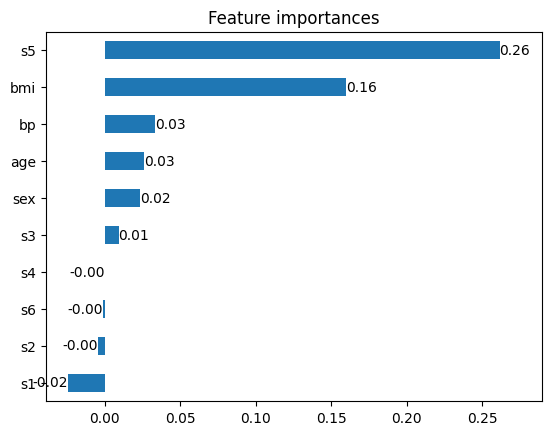

In [ ]:
ax = inspector.plot_permutation_importance()

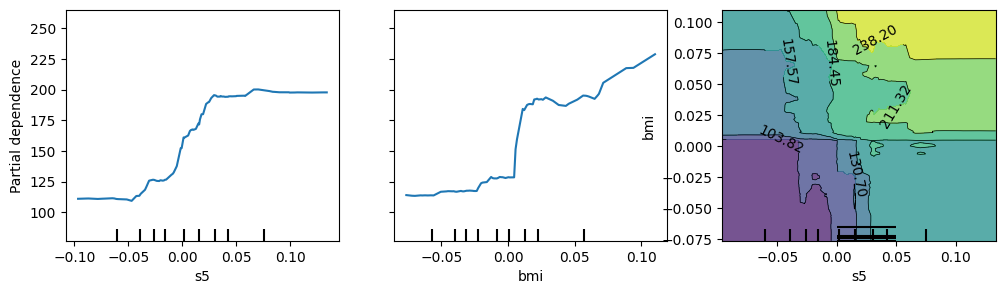

In [ ]:
most_important_features = inspector.permutation_importance().index[:2]
axes = inspector.plot_partial_dependence(
    features=[*most_important_features, most_important_features]
)
axes[0, 0].get_figure().set_size_inches(12, 3)

In [ ]:
inspector.show_correlation()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.13,0.16,0.39,0.34,0.23,-0.06,0.27,0.43,0.31,0.28
sex,0.13,1.00,0.09,0.18,-0.05,0.10,-0.36,0.28,0.12,0.25,-0.00
bmi,0.16,0.09,1.00,0.48,0.26,0.24,-0.35,0.38,0.49,0.41,0.51
bp,0.39,0.18,0.48,1.00,0.21,0.07,-0.11,0.22,0.42,0.33,0.46
s1,0.34,-0.05,0.26,0.21,1.00,0.87,0.08,0.48,0.53,0.25,0.32
s2,0.23,0.10,0.24,0.07,0.87,1.00,-0.18,0.59,0.31,0.21,0.24
s3,-0.06,-0.36,-0.35,-0.11,0.08,-0.18,1.00,-0.76,-0.41,-0.21,-0.33
s4,0.27,0.28,0.38,0.22,0.48,0.59,-0.76,1.00,0.66,0.31,0.44
s5,0.43,0.12,0.49,0.42,0.53,0.31,-0.41,0.66,1.00,0.38,0.60
s6,0.31,0.25,0.41,0.33,0.25,0.21,-0.21,0.31,0.38,1.00,0.34


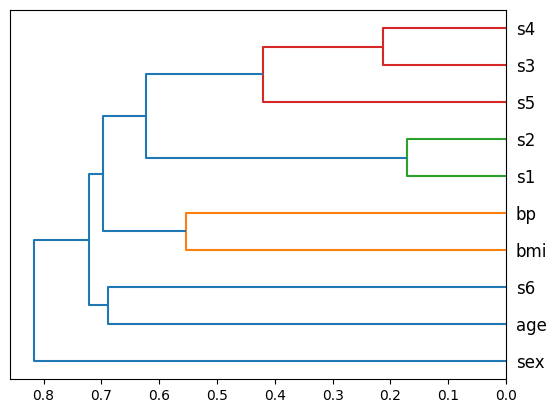

In [ ]:
ax = inspector.plot_feature_clusters()

The methods that are available for a given inspector depends on the types of its estimator and its target `y`. An attribute called `methods` tells you what they are:

In [ ]:
inspector.methods

['permutation_importance',
 'plot_feature_clusters',
 'plot_partial_dependence',
 'plot_permutation_importance',
 'plot_pred_vs_act',
 'plot_residuals',
 'show_correlation']

## Install

`pip install model_inspector`

## Alternatives

The most similar library to model_inspector that I am aware of is [Yellowbrick](https://www.scikit-yb.org/en/latest/). Both are machine learning visualization libraries designed to extend `scikit-learn`.

Yellowbrick is designed around `Visualizer` objects. Each `Visualizer` corresponds to a single type of visualization. The `Visualizer` interface is similar to the `scikit-learn` transformer and estimator interfaces.

`model_inspector` takes a different approach. It is designed around `Inspector` objects that bundle together a `scikit-learn` model, an `X` feature DataFrame, and a `y` target Series. The `Inspector` object does the work of identifying appropriate visualization types for the specific model and dataset in question and exposing corresponding methods, making it easy to visualize a given model for a given dataset in a variety of ways.

## Acknowledgments

Many aspects of this library were inspired by [FastAI courses](https://course.fast.ai/), including bundling together a model with data in a class and providing certain specific visualization methods such as feature importance bar plots, feature clusters dendrograms, tree diagrams, waterfall plots, and partial dependence plots. Its primary contribution is to make all of these methods available in a single convenient interface.